#Solving Traveling Salesman Problem using Gurobi

In [1]:
%pip install gurobipy

     |████████████████████████████████| 11.1 MB 136 kB/s 


In [211]:
import numpy as np
import pandas as pd
from random import random
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

In [230]:
def get_route(stations, dist, start=0):
  """Get the shortest route"""
  n_stations = len(stations)
  u_stations = list(range(n_stations))

  model = gp.Model()
  x = model.addVars(dist.keys(), vtype=GRB.BINARY, name='x')
  u = model.addVars(u_stations, vtype=GRB.CONTINUOUS, name='u')

  c_row = model.addConstrs(gp.quicksum(x[i,j] for j in u_stations if j!=i)==1 for i in u_stations)
  c_col = model.addConstrs(gp.quicksum(x[i,j] for i in u_stations if j!=i)==1 for j in u_stations)
  c_connect = model.addConstrs((x[i,j]==1) >> (u[i]+1==u[j]) for i,j in dist.keys() if j!=0)

  model.setObjective(gp.quicksum(dist[arc]*x[arc] for arc in dist.keys()), GRB.MINIMIZE)
  model.optimize()

  conn = {}
  for k, v in zip(dist.keys(), model.getVars()):
    if v.X > 0.5:
      conn[k[0]] = k[1]
  
  head = start
  result = [head]
  for _ in range(n_stations-1):
    result.append(conn[head])
    head = conn[head]
  return result

In [231]:
stations = []
n_stations = 25

for _ in range(n_stations):
  x = random()
  y = random()
  stations.append((x,y))

def d_eu(p1, p2):
  return ((p1[0] - p2[0])**2+(p1[1] - p2[1])**2)**0.5

dist = {(i1, i2): d_eu(s1, s2) for i1, s1 in enumerate(stations) for i2, s2 in enumerate(stations) if i1 != i2}

route = get_route(stations, dist)

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 50 rows, 625 columns and 1200 nonzeros
Model fingerprint: 0xb8ac4b93
Model has 576 general constraints
Variable types: 25 continuous, 600 integer (600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve added 576 rows and 576 columns
Presolve time: 0.02s
Presolved: 626 rows, 1201 columns, 2652 nonzeros
Presolved model has 576 SOS constraint(s)
Variable types: 601 continuous, 600 integer (600 binary)

Root relaxation: objective 3.124446e+00, 39 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    3.12445    0   24          -    3.12445      -     -    0s
     0     0    3.12

(-0.1, 1.1)

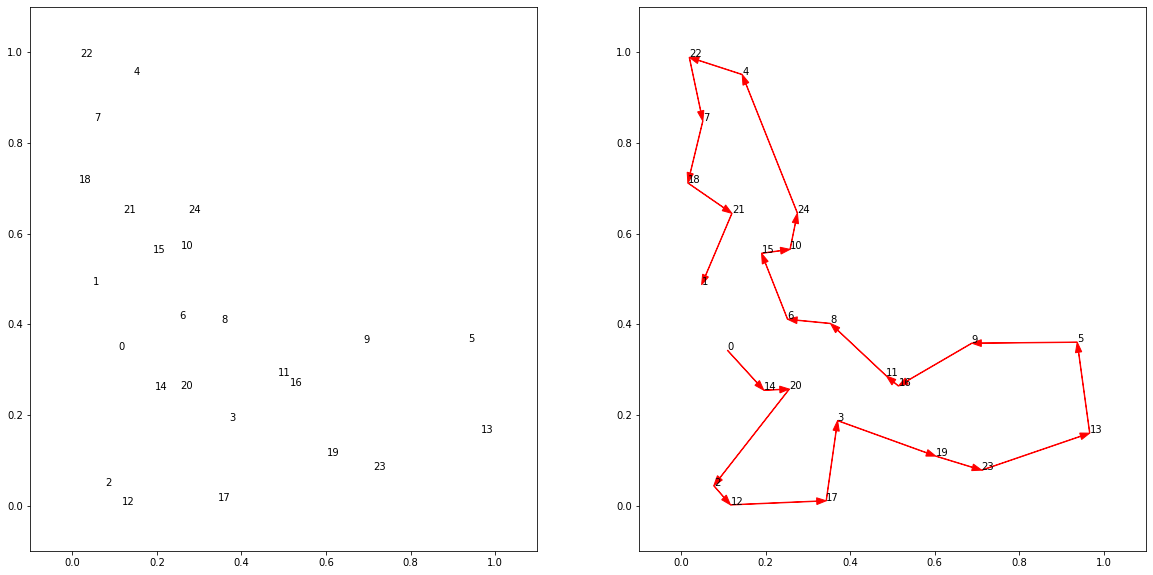

In [233]:
fig, axs = plt.subplots(1,2,figsize=(20,10))

for i, idx in enumerate(route):
  axs[0].text(*stations[idx], idx)
  axs[1].text(*stations[idx], idx)

for i, idx in enumerate(route[:-1]):
  x, y = stations[idx]
  dx, dy = stations[route[i+1]][0]-x, stations[route[i+1]][1]-y
  axs[1].arrow(x, y, dx, dy, color="red", head_width=0.015, length_includes_head=True)

axs[0].set_xlim([-0.1, 1.1])
axs[0].set_ylim([-0.1, 1.1])
axs[1].set_xlim([-0.1, 1.1])
axs[1].set_ylim([-0.1, 1.1])